<a href="https://colab.research.google.com/github/junweiluo/HandsonMLPractice/blob/master/Chapter14Ex09_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The motivation is to upsample a low-resolution picture to a high-resolution one.
One idea is to train an autoencoder and use only the second half of the model?
Or use a high resolution picture to Conv2D to a lower solution one and then train a supervised Conv2DTranspose model.

This is to give a step to step guide to transfer learning.


https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

https://towardsdatascience.com/deep-learning-based-super-resolution-without-using-a-gan-11c9bb5b6cd5

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_sample_image
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [0]:
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

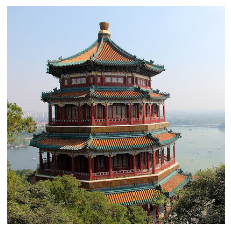

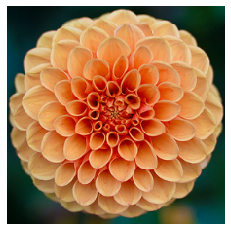

In [7]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [11]:
tf.random.set_seed(42)
X = images_resized.numpy()
X.shape

(2, 224, 224, 3)

In [13]:
conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID")
# what are the filters?  Random initialization?
# strides=2 makes output twice big as X.
output = conv_transpose(X)
output.shape

TensorShape([2, 449, 449, 5])

<function matplotlib.pyplot.show>

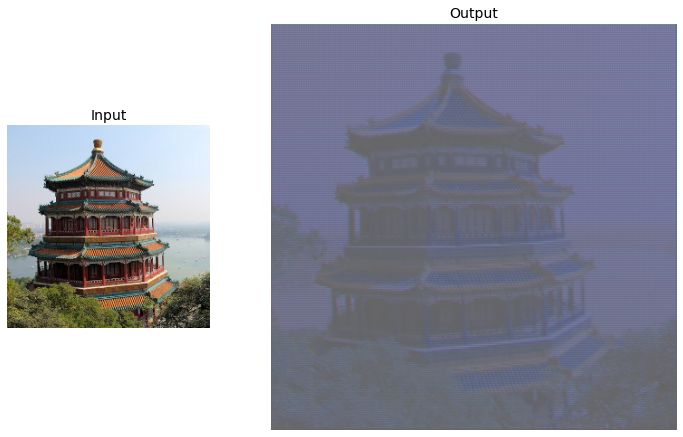

In [27]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image, only 3 channels needed.
ax2.axis("off")
plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


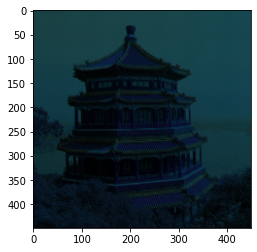

In [23]:
plt.imshow(output[0, ..., :3])  # RGB only needs 3 channels.

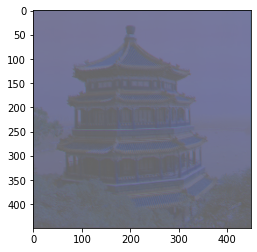

In [29]:
plt.imshow(normalize(output[0, ..., :3]))

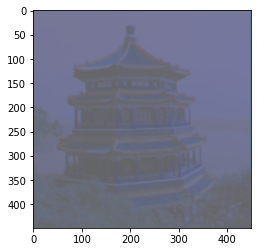

In [31]:
plt.imshow(normalize(output[0, ..., :3]), interpolation= "bicubic" )

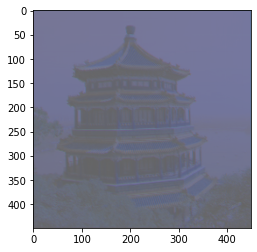

In [32]:
plt.imshow(normalize(output[0, ..., :3]), interpolation= "bilinear" )

https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html